In [1]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

fig_DIR = "../figs/shots/"
data_DIR = "../data/ShotLocationData/"

bball_gray = "#312f30"
bball_white = "#dddee0"
bball_orange = "#f87c24"
bball_light_orange = "#fbaf7b"
bball_black = "#000010"
dark_grey = "#282828"
fontsize = 28
title_size = 48

# Plot for Player

In [22]:
league = "NBA"
from_year = 2024
player_dict = get_players(league=league, from_year=from_year, to_year=from_year)
data = pd.read_parquet(data_DIR + f"{league}_Shot_Loc_{from_year}.parquet")

In [23]:
def plot_heatmap_player(player,data):

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111)

    d1 = 15
    d2 = 22
    t1 = 12
    t2 = 16
    cond1 = data["player_name"] == player

    cond2 = data["shot_type"] != "AtRim"
    cond3 = data["distance"] >= d1
    cond4 = data["distance"] < d2
    cond5 = data["seconds_since_previous_event"] >= 24
    cond6 = data["seconds_since_previous_event"] <= 37
    cond7 = (data["shot_type"] == "Arc3") | (data["shot_type"] == "Corner3")
    cond9 = data["player_ast_name"] == player
    cond0 = data["is_made"] == True
    
    shots_df = data[cond1]
    shots_df = data[cond1]
    # shots_df = data[cond1 & cond7 & cond0 ]
    player_id = shots_df["player_id"].iloc[1]
    # player_id = shots_df['player_ast_id'].iloc[1]
    # shots_df = shots_df.sample(frac=0.5)
    ax.set_xlim(252, -252)
    ax.set_ylim(-50, 423)
    ax.set_facecolor(bball_black)
    fig.set_facecolor(bball_black)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    draw_court(ax=ax, outer_lines=True, lw=3, color=bball_orange)
    sns.kdeplot(
        x=shots_df.locX, y=shots_df.locY, fill=True, cmap="inferno", levels=21, ax=ax
    )
    ax.scatter(x=shots_df.locX, y=shots_df.locY, facecolors="w", s=5, linewidths=0.5)

    ax.text(
        x=+180, y=-65, s="@SravanNBA", color=bball_white, fontsize=fontsize, ha="center"
    )
    ax.text(
        x=-180,
        y=-65,
        s="Source:pbpstats",
        color=bball_white,
        fontsize=fontsize,
        ha="center",
    )
    try:
        target_dir = "player_imgs"
        if f"{player_id}.png" not in os.listdir(target_dir):
            if league == "NBA":
                url = f"https://cdn.nba.com/headshots/nba/latest/260x190/{player_id}.png"
            elif league == "WNBA":
                url = f"https://ak-static.cms.nba.com/wp-content/uploads/headshots/wnba/{player_id}.png"
            response = requests.get(url)
            with open(f"player_imgs/{player_id}.png", "wb") as f:
                f.write(response.content)
        if league == "NBA":
            size = 1.0
        elif league == "WNBA":
            size = 0.4
        ab = AnnotationBbox(
            OffsetImage(plt.imread(f"player_imgs/{player_id}.png"), size=size),
            (-195, 380),
            frameon=False,
        )
        ax.add_artist(ab)
    except:
        pass
    # ax.set_title('Shot Heat Map: Distance (ft) > {0} '.format(d1,d2), size=title_size, color='Orange')
    # ax.set_title('Shot Heat Map: {0} < Distance (ft) < {1}'.format(d1,d2), size=title_size, color='Orange')
    # plt.savefig('Shot_Heat_Map_dis_{0}_{1}.png'.format(d1,d2), bbox_inches='tight', facecolor=bball_black,dpi=300)
    if league == "NBA":
        ax.text(
            x=180,
            y=400,
            s="{0}-{1} NBA".format(from_year, from_year + 1),
            color="White",
            fontsize=fontsize,
            ha="center",
            va="bottom",
        )
    elif league == "WNBA":
        ax.text(
            x=180,
            y=400,
            s=f"{from_year} WNBA",
            color="White",
            fontsize=fontsize,
            ha="center",
            va="bottom",
        )
    ax.text(
        x=180,
        y=380,
        s="Regular Season",
        color="White",
        fontsize=fontsize,
        ha="center",
        va="bottom",
    )
    # ax.text(x=-180, y=400, s="Makes Only", color='White', fontsize=fontsize, ha='center',va='bottom')
    # ax.text(x=-180, y=380, s="Non-Rim Attempts", color='White', fontsize=fontsize, ha='center',va='bottom')
    ax.set_title(f"Shot Heat Map: {player}", size=title_size, color="Orange")
    plt.savefig(
        fig_DIR + f"Shot_Heat_Map_{player}.png",
        bbox_inches="tight",
        facecolor=bball_black,
        dpi=300,
    )
    # ax.set_title('Shots Assisted by: {0}'.format(player), size=title_size, color='Orange')
    # plt.savefig(fig_DIR+'Assist_Heat_Map_{0}.png'.format(player), bbox_inches='tight', facecolor=bball_black,dpi=300)

    # ax.set_title('NBA Shot Heat Map: {0}-{1}'.format(from_year,from_year+1), size=title_size, color='Orange')
    # plt.savefig(fig_DIR+'Shot_Heat_Map_{0}_{1}.png'.format(from_year,from_year+1), bbox_inches='tight', facecolor=bball_black,dpi=300)
    plt.show()

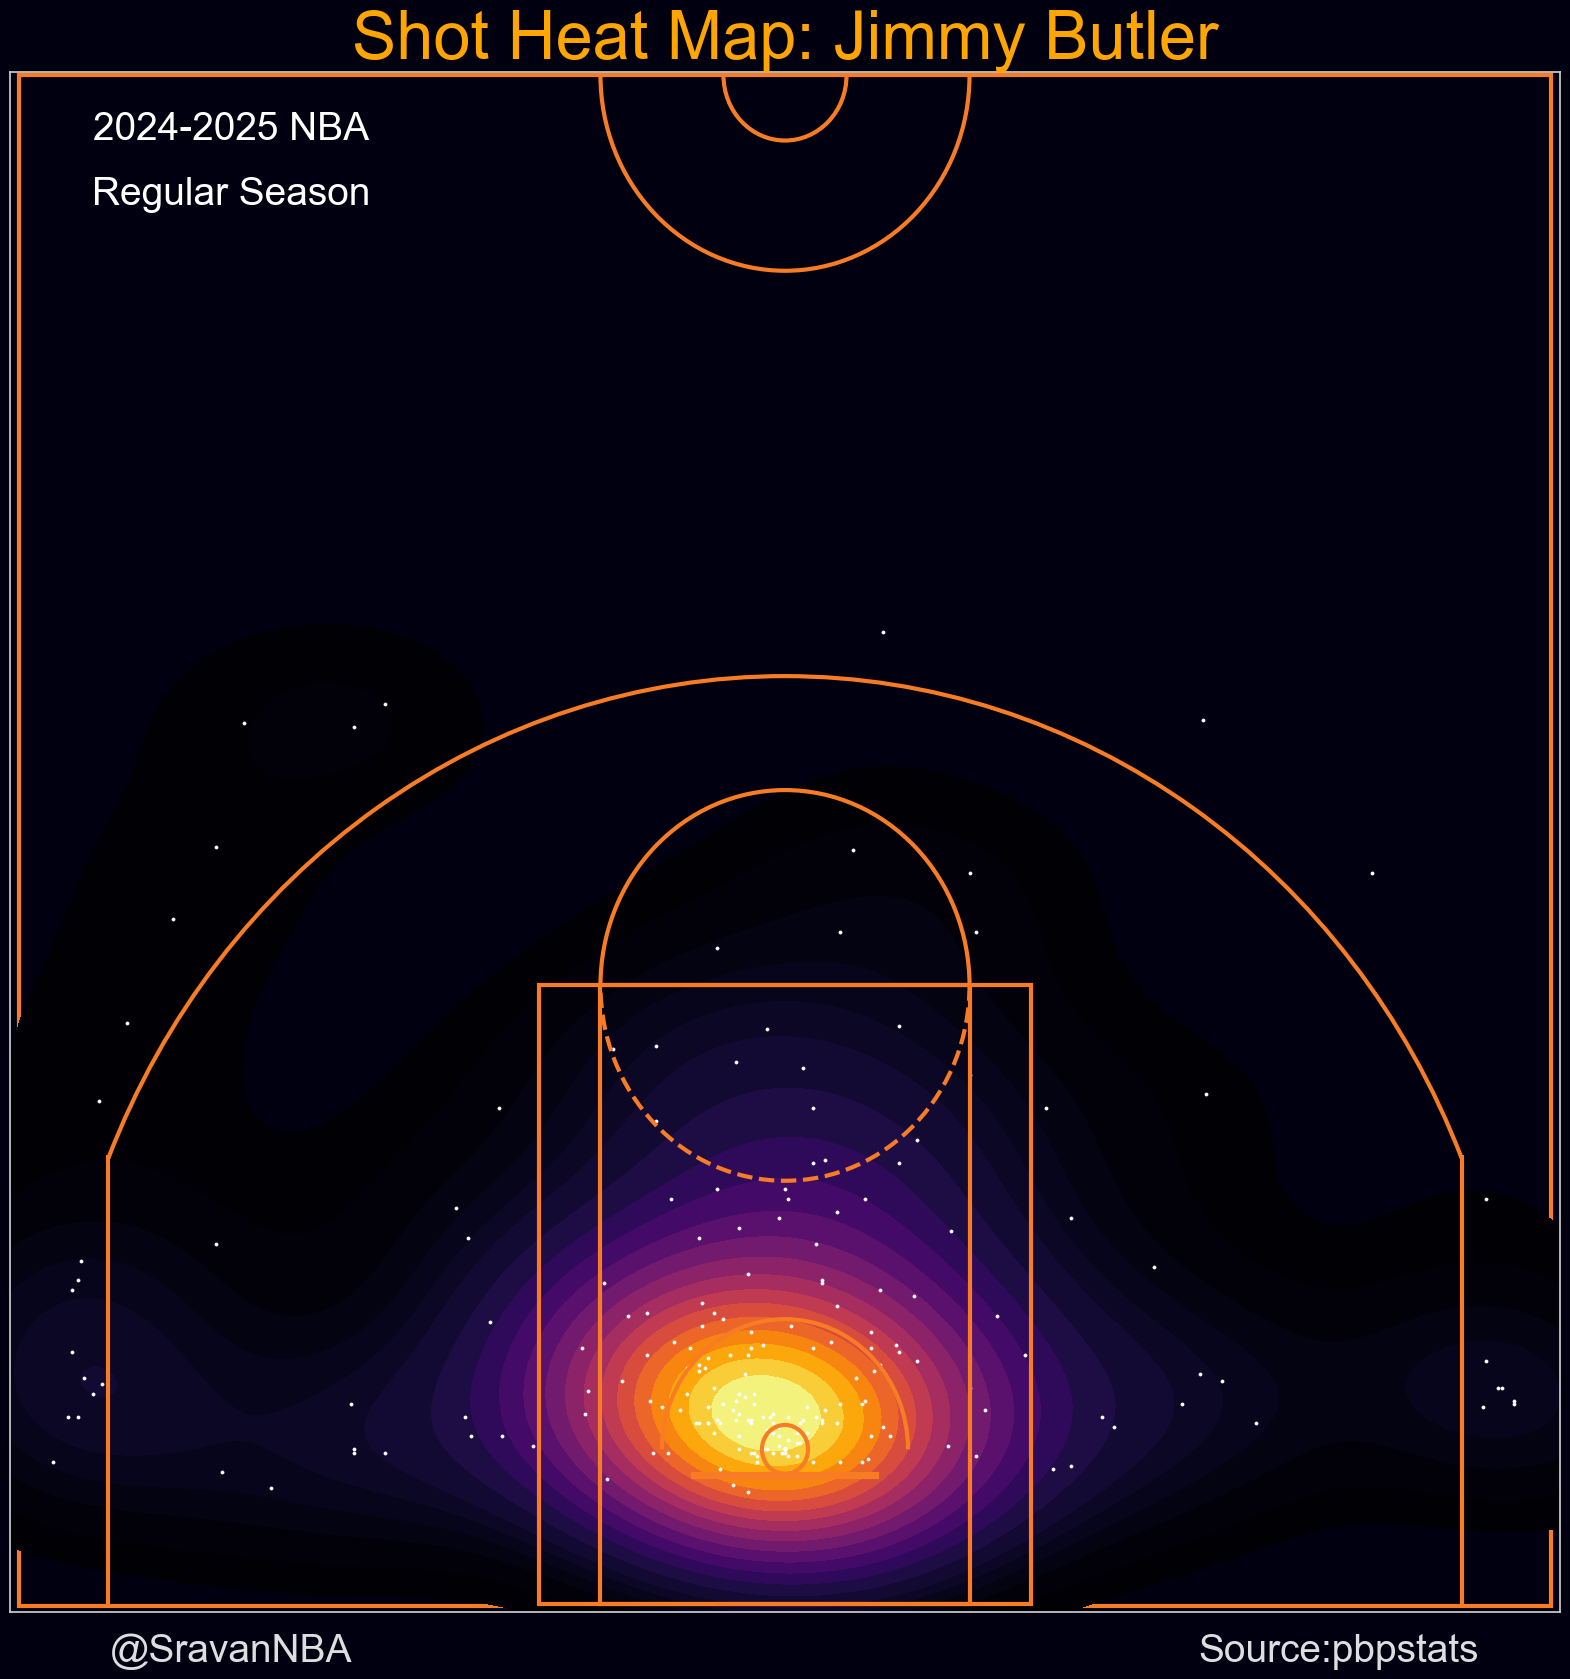

In [41]:
plot_heatmap_player("Jimmy Butler",data)

# Plot for League

In [4]:
data.columns

Index(['game_id', 'clock', 'player_id', 'team_id', 'distance', 'locX', 'locY',
       'shot_value', 'shot_type', 'is_and1', 'is_assisted', 'is_blocked',
       'is_corner_3', 'is_heave', 'is_made', 'is_putback', 'player_ast_id',
       'period', 'score_margin', 'seconds_remaining',
       'seconds_since_previous_event', 'player_name', 'player_ast_name'],
      dtype='object')

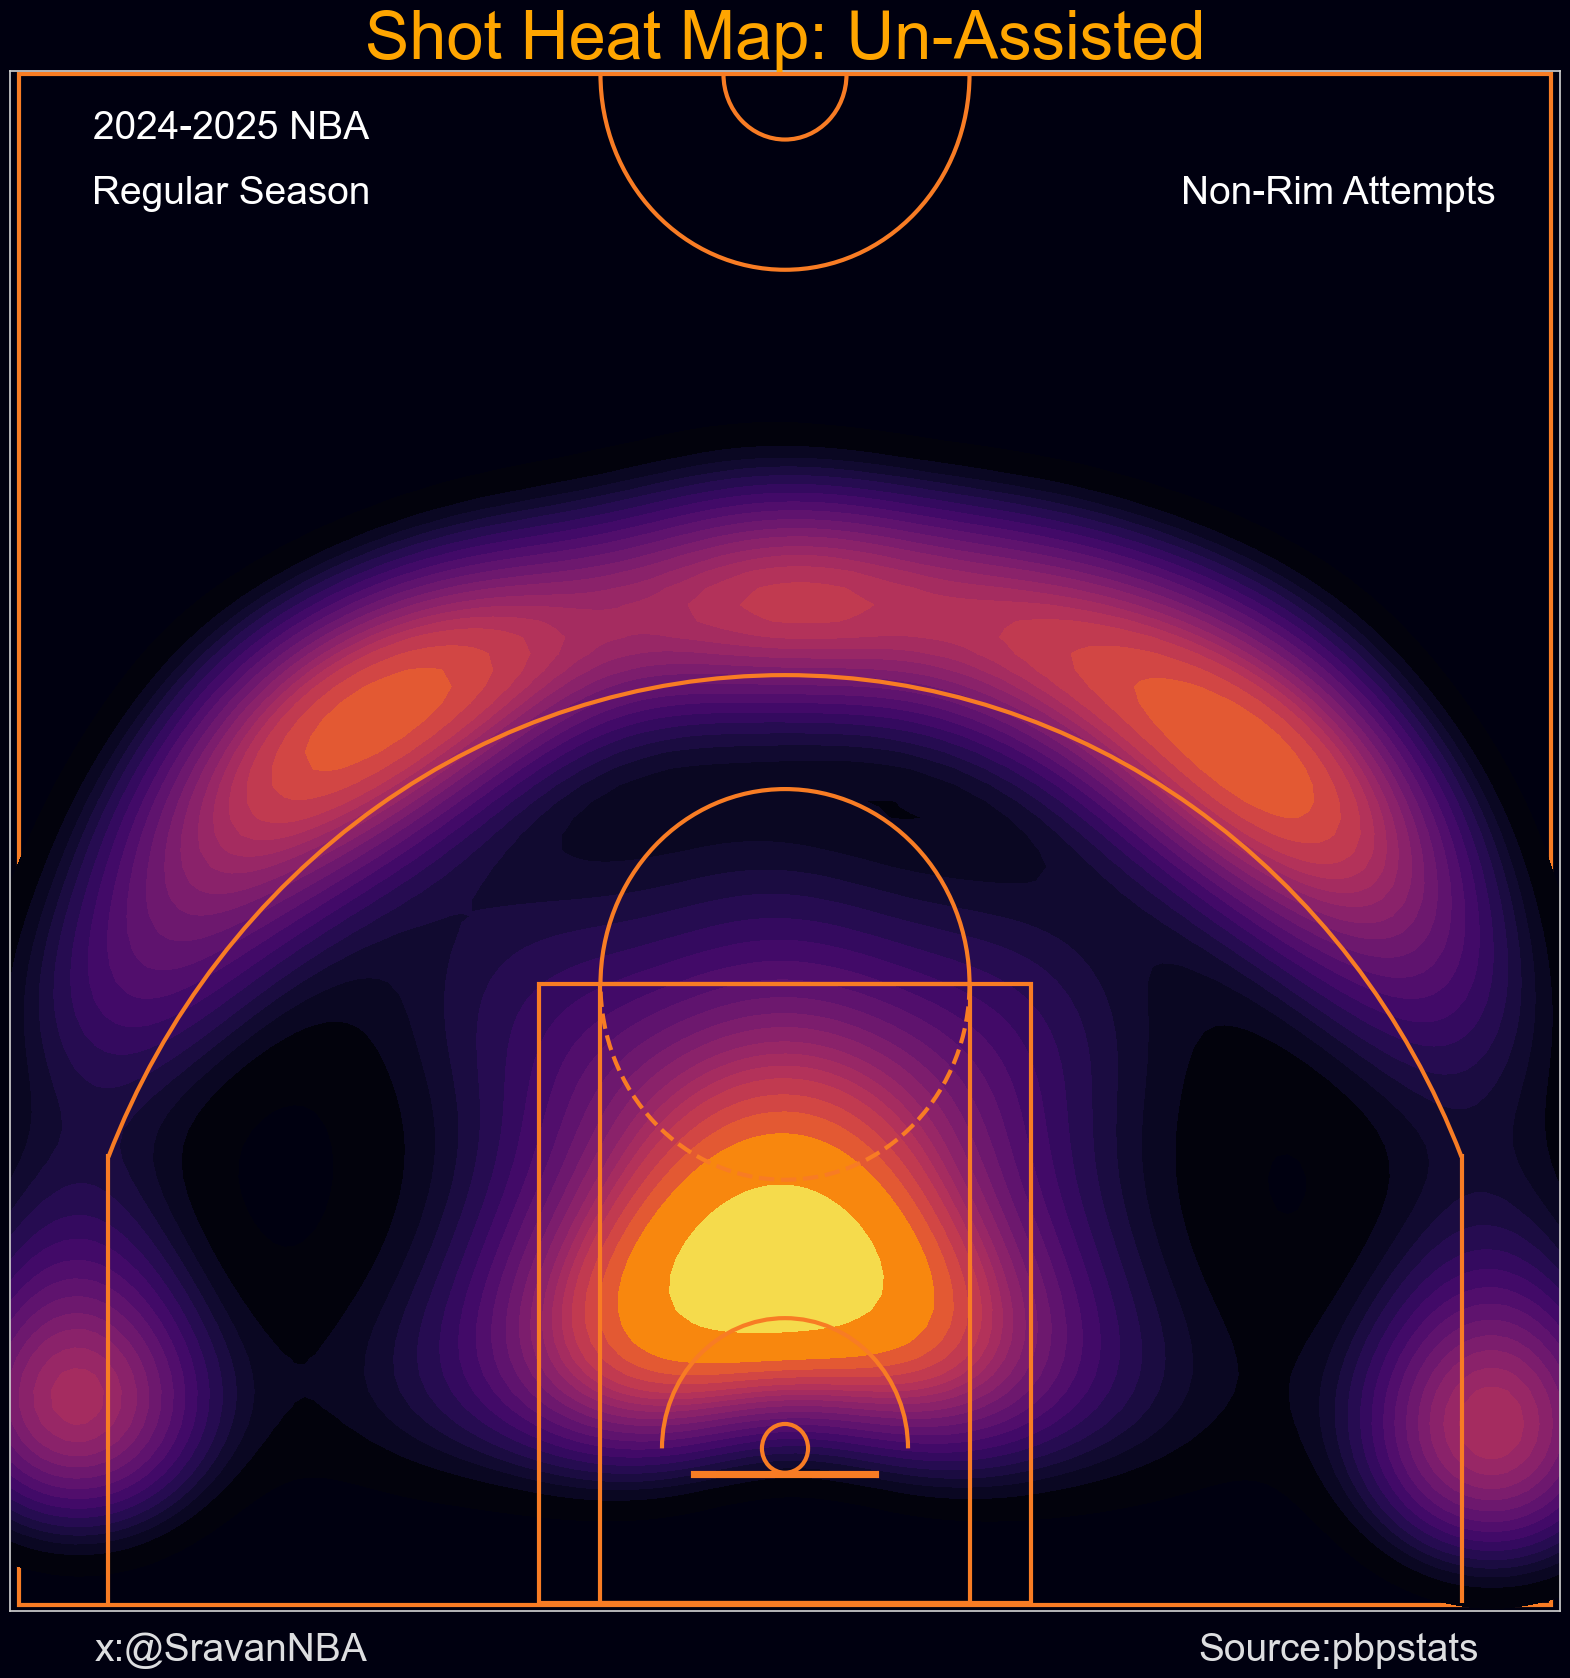

In [15]:
desc = "Un-Assisted"
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)

cond1 = data["is_assisted"] == True
cond1 = data["is_assisted"] != True
cond2 = data["shot_type"] != "AtRim"
cond3 = (data["shot_type"] == "Arc3") | (data["shot_type"] == "Corner3")
cond0 = data["is_made"] == True

shots_df = data[cond1 & cond2]
shots_df = shots_df.sample(frac=0.2)

ax.set_xlim(252, -252)
ax.set_ylim(-50, 423)
ax.set_facecolor(bball_black)
fig.set_facecolor(bball_black)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
draw_court(ax=ax, outer_lines=True, lw=3, color=bball_orange)
sns.kdeplot(
    x=shots_df.locX, y=shots_df.locY, fill=True, cmap="inferno", levels=21, ax=ax
)
# ax.scatter(x=shots_df.locX, y=shots_df.locY, facecolors="w", s=5, linewidths=0.5)
ax.text(x=+180, y=-65, s="x:@SravanNBA", color=bball_white, fontsize=fontsize, ha="center")
ax.text(x=-180,y=-65,s="Source:pbpstats",color=bball_white,fontsize=fontsize,ha="center",)
if league == "NBA":
    ax.text(x=180,y=400,s="{0}-{1} NBA".format(from_year, from_year + 1),color="White",fontsize=fontsize,ha="center",va="bottom")
elif league == "WNBA":
    ax.text(x=180,y=400,s=f"{from_year} WNBA",color="White",fontsize=fontsize,ha="center",va="bottom",)
ax.text(x=180,y=380,s="Regular Season",color="White",fontsize=fontsize,ha="center",va="bottom",)
# ax.text(x=-180, y=400, s="Makes Only", color='White', fontsize=fontsize, ha='center',va='bottom')
ax.text(x=-180, y=380, s="Non-Rim Attempts", color='White', fontsize=fontsize, ha='center',va='bottom')
ax.set_title(f"Shot Heat Map: {desc}", size=title_size, color="Orange")
plt.savefig(fig_DIR + f"Shot_Heat_Map_{desc} Non Rim.png",bbox_inches="tight",facecolor=bball_black,dpi=300,)
plt.show()

# Plot for Season

In [ ]:
league = "NBA"
year = 2023
for year in np.arange(2000, 2024):
    print(year)
    player_dict = get_players(league=league, from_year=year, to_year=year)
    data = pd.read_csv(data_DIR + f"{league}_Shot_Loc_{year}.csv")
    shots_df = data.copy()
    shots_df = shots_df.query("shot_type != 'AtRim'")
    # shots_df = shots_df.iloc[::20,:]
    shots_df = shots_df.sample(frac=0.2)
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111)
    ax.set_xlim(252, -252)
    ax.set_ylim(-50, 423)
    ax.set_facecolor(bball_black)
    fig.set_facecolor(bball_black)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    sns.kdeplot(
        x=shots_df.locX, y=shots_df.locY, fill=True, cmap="inferno", levels=21, ax=ax
    )
    draw_court(ax=ax, outer_lines=True, lw=3, color=bball_light_orange)
    # ax.scatter(x = shots_df.locX, y = shots_df.locY, facecolors='w', s=5, linewidths=0.5)
    ax.text(
        x=+180, y=-65, s="@SravanNBA", color=bball_white, fontsize=fontsize, ha="center"
    )
    ax.text(
        x=-180,
        y=-65,
        s="Source:pbpstats",
        color=bball_white,
        fontsize=fontsize,
        ha="center",
    )
    ax.text(
        x=170,
        y=400,
        s="Non-Rim attempts only",
        color="White",
        fontsize=fontsize,
        ha="center",
        va="bottom",
    )
    ax.text(
        x=130,
        y=380,
        s="Brighter regions indicate more shots",
        color="White",
        fontsize=fontsize,
        ha="center",
        va="bottom",
    )

    ax.set_title(
        "NBA Shot Frequencies : {0}-{1}".format(year, year + 1),
        size=title_size,
        color="Orange",
    )
    plt.savefig(
        fig_DIR + "Shot_Heat_Map_{0}_{1}.png".format(year, year + 1),
        bbox_inches="tight",
        facecolor=bball_black,
        dpi=300,
    )
# plt.show()

In [ ]:
filenames = [
    fig_DIR + "Shot_Heat_Map_{0}_{1}.png".format(year, year + 1)
    for year in np.arange(2000, 2023)
]

In [ ]:
import imageio.v3 as iio

In [ ]:
images = []
for filename in filenames:
    images.append(iio.imread(filename))

In [ ]:
iio.imwrite(fig_DIR + "Shot_Heat_Map_2000_2023_1.mp4", images, fps=2)